# Прикладная статистика. ДЗ 2.
# Академия Аналитиков Авито

__Правила:__
- Жесткий дедлайн: **2022-12-31 23:59**. 
- Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW2-<ваше имя> через бота @AAA_stats23_bot
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (1 балл)

### На зачет

Пусть $x_1, ... x_N$ — реализация выборки $\xi_1, ... \xi_N \sim \mathcal{N}(\mu,\sigma)$. Мы хотим проверить гипотезу:
- $H_0: \mu = \mu_0$
- $H_1: \mu \neq \mu_0$

Реализовать критерий Стьюдента — функцию `simple_my_t_test(sample, mu_0, alpha)`. Функция должна вернуть `SimpleMyTtestResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue

Какие библиотеки можно использовать:

```
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t
```

In [9]:
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t

**Важно:** что ее решение надо объяснить! Можно не вдаваться в детали, но ваш алгоритм надо описать текстом.

## Решение

Запишем Т-статистику для примеения критерия Стьюдента:

$$ T(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}},  $$

где $ \overline X - $ выборочное среднее, $n - $ размер выборки, а $ S^2 = \frac{1}{n - 1} \underset{i=1} {\overset{n} {\sum}} (X_i - \overline X)^2 - $ несмещенная состоятельная оценка дисперсии.

Тогда для решения задачи необходимо:

Рассчитать статистику $T(X) \rightarrow $ вычислить значение одностороннего p-value $\rightarrow $ умножить значение на 2 в силу симметричности распределения Стьюдента $\rightarrow $ проверить в критической или не критической области лежит статистика и на основании этого принять или отвергнуть гипотезу.

In [14]:
# Автопроверка

MySimpleTtestResults = namedtuple('MySimpleTtestResults', 
                                  ['is_rejected', 'pvalue'])

def my_simple_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MySimpleTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """

    is_rejected = None
    pvalue = None

    # Зададим размер выборки n:
    n = len(sample)
    # Запишем формулу T-статистики:
    t_stat = (np.mean(sample) - mu_0) / (np.var(sample, ddof=1)/n)**0.5 
    # Найдем односторонний p-value и учтем условие на p-value > 0.5:
    pvalue_1 = t(n - 1).cdf(t_stat)
    if pvalue_1 > 0.5:
        pvalue_1 = 1 - t(n - 1).cdf(t_stat)
    # Умножим на 2 и получим итоговое значение p-value:
    pvalue = 2*pvalue_1
    # Учтем, что p-value не может быть больше 1:
    if pvalue > 1:
        pvalue = 1
    # Если статистика попала в критическую область, то отвергаем гипотезу. В противном случае - принимаем:
    if pvalue > alpha:
        is_rejected = False
    else:
        is_rejected = True

    return MySimpleTtestResults(is_rejected, pvalue)


Проверим нашу функцию на адекватность. Для проверки будет использован пример из лекции.

In [15]:
sample = [5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76]
my_simple_t_test(sample, mu_0=7, alpha=0.05)

MySimpleTtestResults(is_rejected=True, pvalue=0.03604071501778502)

Все сходится, мы молодцы (наверное)

## Задача 2 (4 балла)

Решить прошлую задачу без использования распределения Стьюдента,
**пользуясь следующими библиотеками**

```
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos
``` 

In [8]:
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand # равномерное распределение на [0,1)
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos

## Решение

Для самостоятельной реализации метода Стьюдента нам необходима нормально распределенная выборка. Ее мы можем получить с помощью преобразования Бокса-Мюллера:

Пусть $r$ и $\varphi$  — независимые случайные величины, равномерно распределённые на интервале $(0, 1]$. Вычислим $z_0$ и $z_1$ по формулам:
$$ z_0 = \cos (2 \pi \varphi) \sqrt {-2 \ln r}, $$
$$ z_1 = \sin (2 \pi \varphi) \sqrt {-2 \ln r}. $$

Тогда $z_0$ и $z_1$ будут независимы и распределены нормально с математическим ожиданием 0 и дисперсией 1.
Реализуем такую функцию ниже:

In [4]:
# На вход функции подается желаемое количество точек n
def box_muller(n):
    r = rand(n)
    fi = rand(n)
    z0 = cos(2*pi*fi) * (-2*log(r))**0.5
    z1 = sin(2*pi*fi) * (-2*log(r))**0.5
    return z0

Проверим, действительно ли распределение $z_0$ нормально.
Построим стандартное нормальное распределение с помощью numpy и полученное наше распределение из функции box_muller


Text(0.5, 1.0, 'Сравнение распределения Бокса-Мюллера и Нормального распределения')

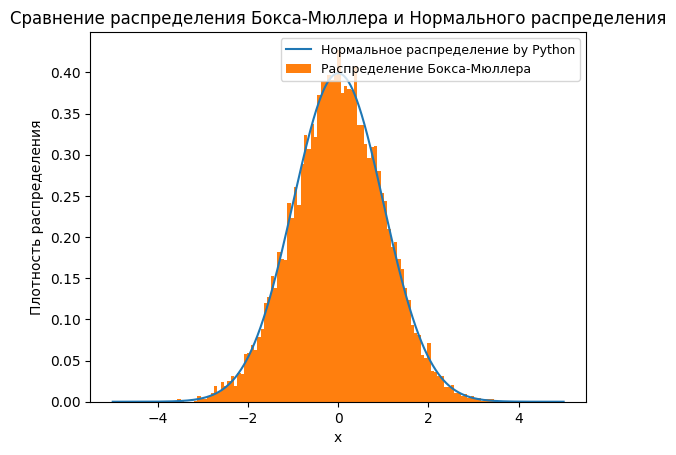

In [8]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm

# Задаем число точек (длину массива z0)
n = 10000

# Строим нормальное распределение с помощью питона
x = np.arange(-5, 5, 0.001)
pyplot.plot(x, norm.pdf(x,0,1), label = 'Нормальное распределение by Python')

# Строим гистограмму плотности полученного нами распределения
pyplot.hist(box_muller(n), bins = int(n/100), density=True, label = 'Распределение Бокса-Мюллера')

# Приводим график в божеский вид
pyplot.xlabel('x')
pyplot.ylabel('Плотность распределения')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Сравнение распределения Бокса-Мюллера и Нормального распределения')

По определению распределения Стьюдента:

Пусть $ Y_{0},Y_{1},\ldots ,Y_{n}$ — независимые стандартные нормальные случайные величины, такие что $Y_{i}\sim {\mathcal {N}}(0,1),\;i=0,\ldots ,n.$ Тогда распределение случайной величины $t$,  где

$t={\frac  {Y_{0}}{{\sqrt  {{\frac  {1}{n}}\sum \limits _{{i=1}}^{n}Y_{i}^{2}}}}},$
называется распределением Стьюдента с $n$ степенями свободы $t\sim {\mathrm  {t}}(n).$

Реализуем для этого функцию distrib_t. На вход функция получает два числа: $n -$ число степеней свободы, $m -$ желаемая длина массива описанного выше распределения $t$.

In [2]:
# Автопроверка

def distrib_t(n,m):
    t_st = [] # Здесь будет храниться выборка описанного выше распределения t
    r = [] # Переменная для хранения случайных величин R для подстановки в фнкцию box_muller
    fi = [] # Переменная для хранения случайных величин phi для подстановки в функцию box_muller
    z0 = [] # Нормально распределенная величина из функции  box_muller
    for j in range(m):
        # Подставляем ранее полученную реализацию функции box_muller, только теперь таких реализаций m штук
        r.append(rand())
        fi.append(rand())
        z0.append( cos(2*pi*fi[j]) * (-2*log(r[j]))**0.5 )

    """Получили нормально распределенную величину z0. Теперь пройдемся по массиву длиной m и будем вытаскивать 
    Y0 как случайный элемент массива z0, а сумма будет складываться из n элементов массива z0 (см. формулу для t)"""
    for j in range(m):
        Y0 = z0[int(abs(rand())*m)]
        sum_square = 0 # Сюда посчитается сумма квадратов из знаменателя выражения для t
        for _ in range(n):
            Yi = z0[int(abs(rand())*m)]
            sum_square += Yi**2
        # Записываем формулу указанного выше распределения t
        t_st.append(Y0/(sum_square/n)**0.5)
    return t_st

Text(0.5, 1.0, 'Сравнение нашего и t-распределения')

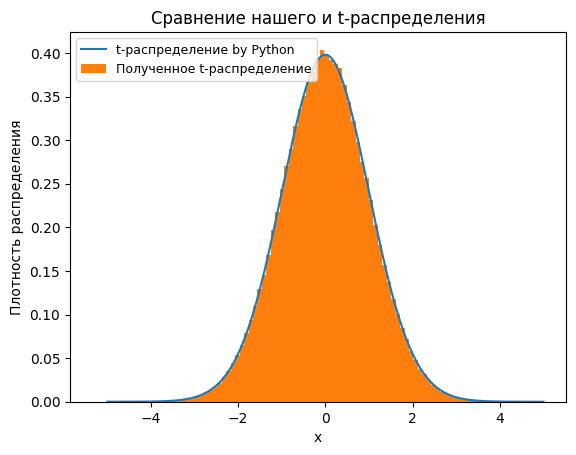

In [111]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import t

# Задаем число степеней свободы n и m - желаемую длину массива t 
n = 100 # Чем меньше n, тем быстрее считается :)
m = 1000000

# Обозначим переменной v результат выполнения функции distrib(n,m)
v = distrib_t(n, m)

# Строим распределение t с помощью питона:
x = np.linspace(-5, 5, 100000)
distrib_t_py = t(df = n)
pyplot.plot(x, distrib_t_py.pdf(x), label='t-распределение by Python')

# Строим гистограмму плотности полученного нами распределения
pyplot.hist(v, bins = 100, density=True, label = 'Полученное t-распределение')

# Приводим график в божеский вид
pyplot.xlabel('x')
pyplot.ylabel('Плотность распределения')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Сравнение нашего и t-распределения')

Теперь у нас есть самодельный критерий. Попробуем с его помощью решить Задачу 1:

In [5]:
# Автопроверка

MyTtestResults = namedtuple('MyTtestResults', ['is_rejected', 'pvalue'])

def my_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
    """

    is_rejected = None
    pvalue = None

   # Зададим размеры выборки n и n:
    n = len(sample)
    m = 1000000
    # Запишем формулу T-статистики:
    t_stat = (mean(sample) - mu_0) / (std(sample, ddof=1)/n**0.5)
    # И наше t-распределение, которое будем использовать вместо питоновского:
    t_handmade = distrib_t(n, m)

    # Получаем вероятность по полученному нами распределению:
    counter = 0
    for i in range(m):
        if abs(t_handmade[int(abs(rand())*m)]) < abs(t_stat):
            counter += 1
    pvalue = 1 - (counter/m)

    # Если статистика попала в критическую область, то отвергаем гипотезу. В противном случае - принимаем:
    if pvalue > alpha:
        is_rejected = False
    else:
        is_rejected = True

    return MyTtestResults(is_rejected, pvalue)

- Для получения полного балла, p-value вашего критерия не должно отличаться от p-value `scipy.stats.ttest_1samp` больше, чем на 10^-3.
- Если ваш код для одного теста работает больше минуты - он не засчитывается.

Итак, проверим наше решение с решением предыдущей задачи, а также с решением, которое предлагает библиотека scipy.stats. Использовать будем тот же пример, что и в первой задаче:

In [128]:
from scipy.stats import ttest_1samp

sample = [5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76]

print(my_simple_t_test(sample, mu_0 =7, alpha = 0.05))
print(my_t_test(sample, mu_0=7, alpha=0.05))
print(ttest_1samp(sample, popmean=7, alternative='two-sided'))

MySimpleTtestResults(is_rejected=True, pvalue=0.03604071501778502)
MyTtestResults(is_rejected=True, pvalue=0.03090000000000004)
Ttest_1sampResult(statistic=-2.690248997410561, pvalue=0.03604071501778502)


Gotcha!

## Задача 3 (4 балла)

### На зачет

**1. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_0$:

- Зафиксировать $\mu = 0,\ \mu_0 = 0$ ($H_0$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок первого рода (False Positive Rate)
- Проверить, стат значимо или нет на уровне 5% отличается полученный процент ошибок от теоретического $\alpha$.


**2. (1.5 балла)**

Провести эксперимент 1 с разными параметрами $n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

--- 
**3. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_1$:

- Зафиксировать $\mu \neq 0,\ \mu_0 = 0$ ($H_1$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок второго рода (False Negative Rate)
- Построить доверительный интервал для мощности критерия при заданном $\mu$.

**4. (1.5 балла)**

Провести предыдущий эксперимент с разными параметрами $\mu, n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

## Пункт 1

Чтобы проверить критерий, будем использовать метод Монте-Карло. То есть повторим эксперимент как можно больше раз с некоторыми фиксированными параметрами.

Нам понадобятся библиотеки:

In [29]:
from statsmodels.stats.proportion import proportion_confint
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot

Зафиксируем необходимые параметры задачи:

In [44]:
repeat = 10000  # Количество повторений эксперимента
mu = 0
mu_0 = 0  # H_0 справедлива
sigma = 1
alpha = 0.05
n = 20  # Размер выборки

План действий:

Выбираем распределение (в нашем случае - нормальное) $\rightarrow$ Создаем выборку для верной $H_0$ $\rightarrow$ Проверяем, принялась или отверглась нулевая гипотеза $\rightarrow$ Повторяем ~~до посинения~~ $repeat$ число раз.

Зная число ложных срабатываний (итоговое значение счетчика $counter$), мы можем вычислить долю ложных срабатываний (он же FPR), разделив число ложных срабатываний на обще число повторений

In [45]:
# Выбираем распределение с заданными параметрами
sample_distr = norm(loc=mu, scale=sigma) 
# Заводим счетчик ложных срабатываний
counter = 0
# Заводим цикл повторений
for i in range(repeat):
    test_sample = sample_distr.rvs(n)
    if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == True:
        counter +=1

FPR = counter/repeat
print(f'FPR = { FPR }')


FPR = 0.0508


Чтобы понять, хорошо ли работает наш критерий, нужно посмотреть, лежит ли FPR в доверительном интервале.

In [46]:
proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')

(0.04666599590665271, 0.05527898822956312)

In [50]:
a = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')
a[1]

0.05527898822956312

Как видно, FPR лежит в доверительном интервале, значит критерий хорошо работает.

## Пункт 2

Проверим как различные $n, \sigma, \alpha$ влияют на результаты эксперимента

### 2.1 Начнем с $n$

Возьмем n от 2 (чтобы была хоть какая-то выборка) до 100 с шагом в 10, зафиксировав остальные параметры. Результаты изобразим в виде графика

In [59]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
mu = 0
mu_0 = 0  
sigma = 1
alpha = 0.05

n = []
FPR = []  # Сюда записываем FPR для каждого n
CI = [[],[]]  # Сюда записываем доверительный интервал для каждого n

# Заполняем массив n от 2х до 100 с шагом в 10
for i in range(2, 100, 10):
    n.append(i)

for j in range(len(n)):   

    sample_distr = norm(loc=mu, scale=sigma) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n[j])
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == True:
            counter +=1

    FPR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FPR от размера выборки n')

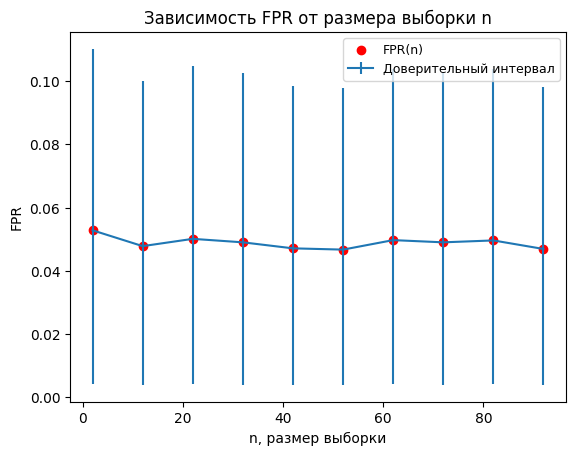

In [65]:
pyplot.scatter(n, FPR, label='FPR(n)', c='r')
pyplot.errorbar(n,FPR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('n, размер выборки')
pyplot.ylabel('FPR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FPR от размера выборки n')

Как видно, FPR практически не зависит от n и находится в доверительном интервале

### 2.2 Теперь проделаем то же самое для $\sigma$

In [104]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
mu = 0
mu_0 = 0 
alpha = 0.05
n = 10

sigma = []
FPR = []  # Сюда записываем FPR для каждого sigma
CI = [[],[]]  # Сюда записываем доверительный интервал для каждого sigma

# Заполняем массив sigma от 1 до 10 с шагом в 1
for i in range(1, 10, 1):
    sigma.append(i)

for j in range(len(sigma)):   

    sample_distr = norm(loc=mu, scale=sigma[j]) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n)
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == True:
            counter +=1

    FPR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FPR от sigma')

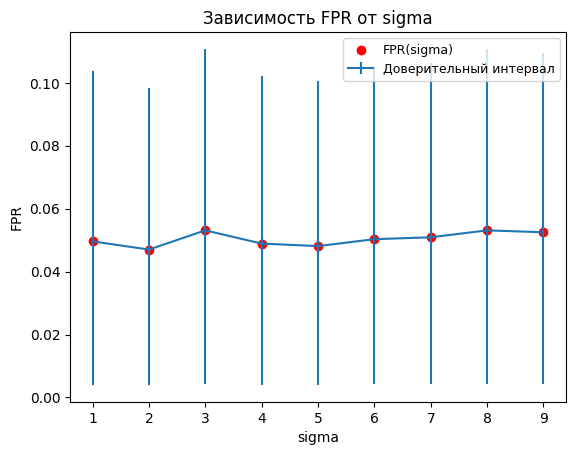

In [105]:
pyplot.scatter(sigma, FPR, label='FPR(sigma)', c='r')
pyplot.errorbar(sigma,FPR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('sigma')
pyplot.ylabel('FPR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FPR от sigma')

FPR также не зависит от среднеквадратичного отклонения

### 2.3 Для $\alpha$

In [106]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
mu = 0
mu_0 = 0 
sigma = 1
n = 10

alpha = []
FPR = []  # Сюда записываем FPR для каждого alpha
CI = [[],[]]  # Сюда записываем доверительный интервал для каждого alpha

# Заполняем массив alpha от 0.01 до 0.2 с шагом в 0.02
for i in range(1, 20, 2):
    alpha.append(i/100)

for j in range(len(alpha)):   

    sample_distr = norm(loc=mu, scale=sigma) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n)
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha[j])[0] == True:
            counter +=1

    FPR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha[j], method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FPR от alpha')

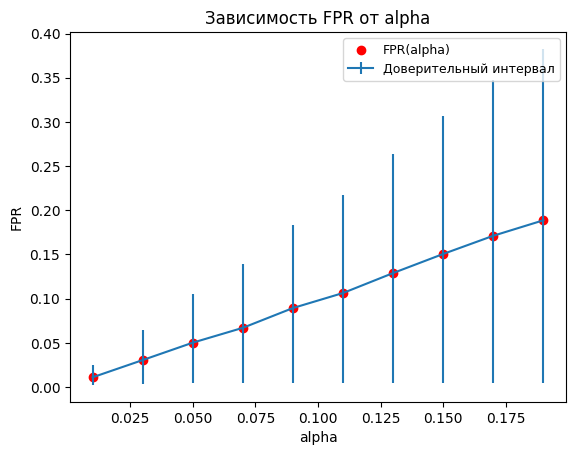

In [107]:
pyplot.scatter(alpha, FPR, label='FPR(alpha)', c='r')
pyplot.errorbar(alpha,FPR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('alpha')
pyplot.ylabel('FPR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FPR от alpha')

С ростом $\alpha$ ожидаемо растет $FPR$ и доверительный интервал, но $FPR$ все еще внутри него.

## Пункт 3

Теперь проверим наш критерий при корректности $H_1$. Аналогично Пункту 1 фиксируем параметры задачи, задаем выборку при верной $H_1$ и считаем доллю ошибок уже второго рода.

In [98]:
# Задаем параметры задачи
repeat = 10000  # Количество повторений эксперимента
mu = 1
mu_0 = 0
sigma = 2
alpha = 0.05
n = 50  # Размер выборки

In [99]:
# Выбираем распределение с заданными параметрами
sample_distr = norm(loc=mu, scale=sigma) 
# Заводим счетчик
counter = 0
# Заводим цикл повторений
for i in range(repeat):
    test_sample = sample_distr.rvs(n)
    # Поскольку теперь считаем число ложных негативных срабатываний, то прибавляем к счетчику 1 при is_rejection = False
    if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == False:
        counter +=1

FNR = counter/repeat
CI = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')

print(f'FNR = { FNR }')
print(f'CI = {CI}')

FNR = 0.0659
CI = (0.061201958607362356, 0.07093142877805905)


При взятых нами параметрах FNR лежит в доверительном интервале и наш критерий хорошо работает и при корректном $H_1$.

Посмотрим на доверительный интервал мощности. Для этого при обсчете $CI$ вычтем из общего числа итераций число FPR

In [100]:
CI_p = proportion_confint(count = repeat - counter, nobs = repeat, alpha=alpha, method='wilson')
print(f'Доверительный интервал мощности = {CI_p}')

Доверительный интервал мощности = (0.929068571221941, 0.9387980413926377)


## Пункт 4

Рассмотрим зависимость FNR нашего критерия от 4х параметров: $\mu, n, \sigma, \alpha$.
Будем использовать такой же алгоритм действий, как и в Пункте 2: варьировать один параметр и фиксировать остальные.

### 4.1 Зависимость от $\mu$

In [110]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
# mu = 1
mu_0 = 0 
sigma = 2
alpha = 0.05
n = 50

mu = []
FNR = []  # Сюда записываем FNR для каждого mu
CI = [[],[]]  # Сюда записываем доверительный интервал для каждого mu

# Заполняем массив mu от 0.01 до 2 с шагом в 0.5. Если взять шаг побольше то не будет считаться 10 минут :)
for i in range(1, 200, 5): 
    mu.append(i/100)

for j in range(len(mu)):   

    sample_distr = norm(loc=mu[j], scale=sigma) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n)
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == False:
            counter +=1

    FNR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FNR от mu')

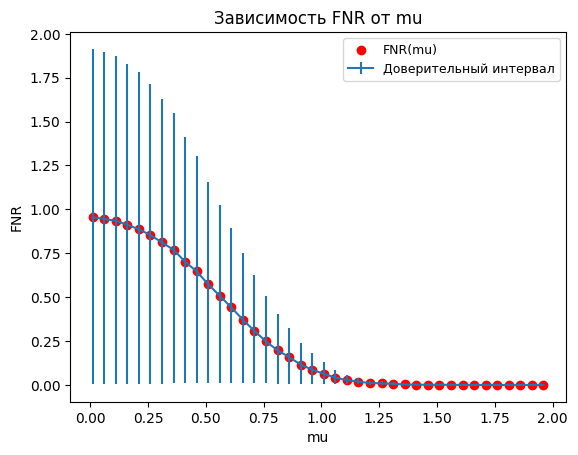

In [111]:
pyplot.scatter(mu, FNR, label='FNR(mu)', c='r')
pyplot.errorbar(mu,FNR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('mu')
pyplot.ylabel('FNR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FNR от mu')

Как видно, $FNR(\mu)$ падает с ростом $\mu$, а затем выходит на плато при $\mu \approx 1.25$

### 4.2 Зависимость от $n$

In [113]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
mu = 1
mu_0 = 0 
sigma = 2
alpha = 0.05
# n = 50

n = []
FNR = [] 
CI = [[],[]] 

for i in range(5, 100, 5): 
    n.append(i)

for j in range(len(n)):   

    sample_distr = norm(loc=mu, scale=sigma) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n[j])
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == False:
            counter +=1

    FNR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FNR от n')

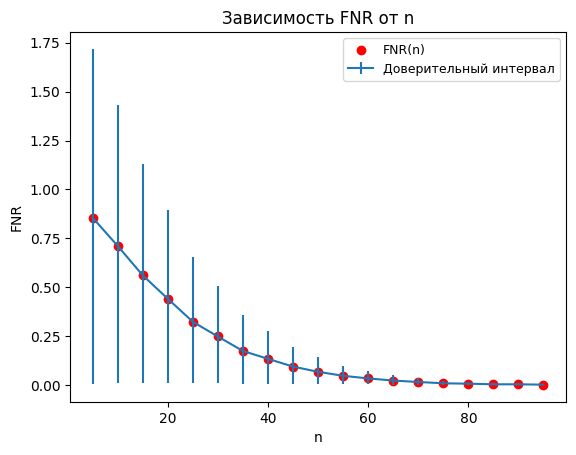

In [114]:
pyplot.scatter(n, FNR, label='FNR(n)', c='r')
pyplot.errorbar(n,FNR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('n')
pyplot.ylabel('FNR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FNR от n')

Чем больше выборка, тем меньше ошибка второго рода, но с какого-то момента (в нашем случае с $n \approx 80$) уже можно считать выборку достаточно большой и FNR практически не изменяется

### 4.3 Зависимость от $\sigma$

In [117]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
mu = 1
mu_0 = 0 
# sigma = 2
alpha = 0.05
n = 50

sigma = []
FNR = [] 
CI = [[],[]] 

for i in range(1, 50, 3):
    sigma.append(i/10)

for j in range(len(sigma)):   

    sample_distr = norm(loc=mu, scale=sigma[j]) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n)
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha)[0] == False:
            counter +=1

    FNR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha, method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FNR от sigma')

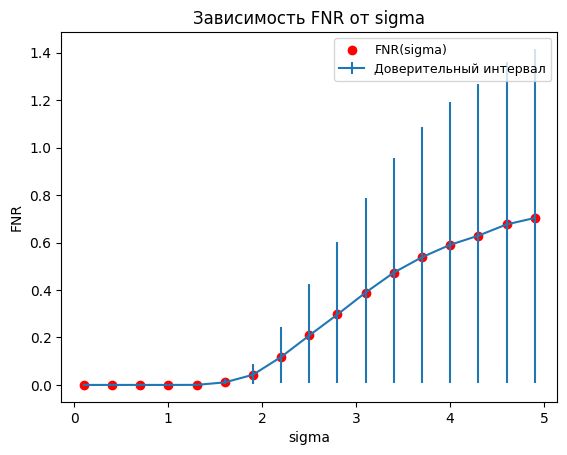

In [118]:
pyplot.scatter(sigma, FNR, label='FNR(sigma)', c='r')
pyplot.errorbar(sigma,FNR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('sigma')
pyplot.ylabel('FNR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FNR от sigma')

Ошибка FNR существенно растёт с ростом $\sigma$

### 4.4 Зависимость от $\alpha$

In [119]:
# Фиксируем параметры предыдущего пункта задачи
repeat = 10000 
mu = 1
mu_0 = 0 
sigma = 2
# alpha = 0.05
n = 50

alpha = []
FNR = [] 
CI = [[],[]] 

for i in range(1, 20, 2):
    alpha.append(i/100)

for j in range(len(alpha)):   

    sample_distr = norm(loc=mu, scale=sigma) 
    counter = 0
    for i in range(repeat):
        test_sample = sample_distr.rvs(n)
        if my_simple_t_test(test_sample, mu_0=mu_0, alpha=alpha[j])[0] == False:
            counter +=1

    FNR.append(counter/repeat)

    # Более удобная запись интервала для построения графика в matplotlib
    ci_tup = proportion_confint(count = counter, nobs = repeat, alpha=alpha[j], method='wilson')
    CI[0].append(ci_tup[0])
    CI[1].append(ci_tup[1])

Text(0.5, 1.0, 'Зависимость FNR от alpha')

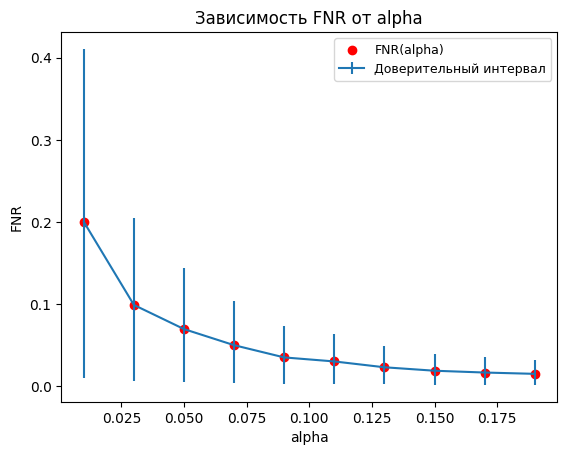

In [120]:
pyplot.scatter(alpha, FNR, label='FNR(alpha)', c='r')
pyplot.errorbar(alpha,FNR, yerr=CI, label='Доверительный интервал')

pyplot.xlabel('alpha')
pyplot.ylabel('FNR')
pyplot.legend(loc = 'best', prop={'size':9})
pyplot.title('Зависимость FNR от alpha')

Ошибка второго рода, наоборот, падает с ростом $\alpha$ по сравнению с ошибкой первого рода

## Задача 4 (2 балла)

### На зачет

Петя скачал себе новую игру себе на телефон. Чтобы начать в нее играть, она должна загрузиться от 0% до 100%, где каждый процент игры загружается независимо ни от чего, и время загрузки каждого процента подчиняется экспоненциальному распределению со средним в 2 сек. Но вот незадача: через 3 минуты Пете надо бежать на автобус к бабушке в деревню, а в дороге Петя хочет уже поиграть( Но игра может скачаться только при подключенном домашнем WI-FI, то есть только только в течение этих 3 минут. С какой вероятностью игра успеет загрузиться и Петя сможет поиграть в дороге? В ответе можно использовать следующие функции распределения:

- Экспоненциальное
- Нормальное
- Равномерное



## Решение

Время загрузки каждого процента подчиняется экспоненциальному закону со средним в 2 секунды. Это значит, что

Матожидание загрузки $1\% : \mu_0 = \frac{1}{\lambda}$

Диспресия загрузки $ 1\% : \sigma^2_0 = \frac{1}{\lambda^2}$

Поскольку каждый процент загружается независимо ни от чего, то у нас есть набор $n = 100$ независимых одинаково распределенных случайных величин, у которых существует конечные матожидание и дисперсия. Значит, мы можем применить Центральную Предельную Теорему (ЦПТ).
По одной из формулировок ЦПТ:

$$ \underset{i=1}{\overset{n}{\sum}} \xi_i \sim \mathcal{N}\left(n \cdot \mu, n \cdot \sigma^2 \right), $$
где $\xi_i - $ независимые одинаково распределенные случайные величины (в нашем случае проценты загрузки), $N(\mu, \sigma^2) - $ стандартное нормальное распределение.

Значит общее время загрузки $T$ будет распределено нормально с матожиданием 
$$\mu = n \cdot \mu_0 = n \cdot \frac{1}{\lambda} = 100 \cdot 2 = 200$$
и дисперсией
$$\sigma^2 = n \cdot \sigma^2_0 = n \cdot \frac{1}{\lambda^2} = 100 \cdot 4 = 400 $$

Осталось найти вероятность того, что общее время загрузки $T$ окажется меньше $t = 180$ 

In [6]:
from scipy.stats import norm

# Задаем нормальное распределение с полученными ранее параметрами
normal = norm(loc=200, scale=20)

# Находим необходимую вероятность
p = normal.cdf(180)*100
percent_p = round(p, 2)
print(f'Вероятность того, что Петя успеет скачать игру до выхода из дома составляет {percent_p}%')

Вероятность того, что Петя успеет скачать игру до выхода из дома составляет 15.87%


## Задача 5 (3 балла)

### На зачет

Пусть есть равные группы A и B. По результатам теста выручка от одного пользователя в среднем в условиях A оценивается Стьдентом как 50 ± 3 руб, а в условиях B как 56 ± 4 руб. Аналитик, увидев такие результаты, говорит, что эффект составил 6 ± 7 руб, а значит результат AB-теста не стат. значим. Все ли корректно в этих рассуждениях? Любой ответ должен быть аргументирован. В случае, еcли в рассуждениях есть ошибка, то надо также посчитать корректно доверительный интервал.


## Решение

Как говорил один известный физик-теоретик: "Самая большая ошибка ученого - это превышение точности". Не будем так лихо складывать ошибки и пересчитаем подробно.

Будем считать, что группы у нас достаточно большие. Тогда можно применить Центральную Предельную Теорему:

$$\overline A \sim \mathcal{N}(\mu_A, \frac{\sigma^2_A}{n})$$
$$\overline B \sim \mathcal{N}(\mu_B, \frac{\sigma^2_B}{n})$$

Опять же, в силу предположения о большой выборке мы можем перейти к T'-тесту и тогда аппроксимация будет выглядеть так:

$$T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/M}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$$

Запишем в этом случае доверительный интервал:

$$ CI = \overline B - \overline A \pm z_{1-\alpha} \left( \sqrt{ \frac{S^2_{A}}{N} + \frac{S^2_{B}}{N}} \right) = \underbrace{\overline B - \overline A}_{6} \pm \sqrt{ \underbrace{ z^2_{1-\alpha} \frac{S^2_{A}}{N} }_{3^2} + \underbrace{ z^2_{1-\alpha} \frac{S^2_{B}}{N}}_{4^2}} = 6 \pm 5  $$

Итак, мы получили доверительный интервал: $6 \pm 5$, в который не входит 0. Это значит, что наш результат всё-таки является статистически значимым.


## Задача 6

### Пункт А. 1 балл: 
#### На зачет

Какая связь между MDE и шириной доверительного интервала в t-test уровня значимости $\alpha$? Точнее, между MDE и `CI length / 2` (шириной дов. интервала пополам).

При каких параметрах ($\alpha,\ \beta$) они будут равны?



## Решение

Вспомним чему равны $CI$ и $MDE$:

$$ CI_{\mu} = \left(\overline X \pm \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{N}} \right) $$
$$ MDE = (z_{1 - \alpha} + z_{1 - \beta}) \cdot \sqrt{\dfrac{S^2}{N}} $$

Для выполнения равенства необходимо равенство z-компонент. Тогда, учитывая условие о половине ширины доверительного интервала, получим:

$$z_{1 - \alpha/2} + z_{1 - \beta} = z_{1 - \alpha/2}$$

### Пункт B. 2 балла: 

Допустим, вам дан критерий $\Psi$ для провекри гипотезы $H_0: D \overline X = \sigma^2$. Статистика критерия &mdash; $S^2$, а сам критерий является черным ящиком. Можно ли найти такие параметры $\alpha$, $\beta$, чтобы значение MDE равнялась `CI length / 2` уровня значимости $\alpha$? При этом вы не знаете распределения $S^2$?

Какого свойства распределения статистики вам не хватает, чтобы можно было без знания самого распределения приравнять MDE и половину ширины дов. интервала?

Ничего не поняла :(

## Задача 7 (1 балл)

### Пункт А. 1 балл:

Пусть даны независимые выборки $A, B$ равного размера. То есть у вас есть выборки $A_1, A_2, \dots A_N$ и $B_1, B_2, \dots B_N$, N большое.

Докажите теоретически, что в этом случае вы можете точно также использовать `T'-test`. То есть:

$T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$, 
Где $S^2$ &mdash; статистика S^2 для некоторой выборки



## Решение

Так как выборка большая, то из ЦПТ:

$$\overline A \sim \mathcal{N}(\mu_A, \frac{\sigma^2_A}{N})$$
$$\overline B \sim \mathcal{N}(\mu_B, \frac{\sigma^2_B}{N})$$

Рассмотрим разность и воспользуемся свойствами матожидания и дисперсии:

$$\overline A - \overline B \sim \mathcal{N}(\mu_A - \mu_B, \frac{\sigma^2_A}{N} + \frac{\sigma^2_B}{N}) \text{ } \text{ } \text{ } \text{ } \text{ } \text{ } \text{ } \text{ } \text{ }  (1)$$

Разделим на $\sqrt{\frac{\sigma^2_A + \sigma^2_B}{N}}$, что есть не что иное как $\sqrt{\frac{S^2}{N}}$ и получим искомое:

$$ \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1) $$

### Пункт B* 2 балла:

Докажите что в этом случае

- $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$


## Решение

Вернемся к формуле (1) пункта А.

По теореме о непрерывном отображении при большой выборке $S^2$ сходится по вероятности к $\sigma^2$ или $\dfrac{\sigma^2}{S^2}  \stackrel{p}{\rightarrow} 1$

То есть:

$$ (1) \propto  \overline A - \overline B \sim \mathcal{N}(\mu_A - \mu_B, \frac{S^2_A}{N} + \frac{S^2_B}{N}) $$

Снова разделим на $\frac{S^2_A}{N} + \frac{S^2_B}{N}$ и при справедливости $H_0: \mu_A = \mu_B$ получим искомое:

$$ T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1) $$

## Задача 8* (3 балла)

На занятии мы увидели, почему большой размер выборки помогает точнее получить оценку для матожидания случайной величины. Используя аппарат математической статистики, покажите, какому товару стоит доверять больше. Возможно, вам придётся использовать допущения, но такова жизнь.

Согласны ли вы с автором поста? Есть ли дополнительные (не связанные с математикой) причины доверять правому товару больше чем левому?

![](https://i.ibb.co/HHWfF8s/change.jpg)

In [141]:
from scipy.stats import norm, ttest_1samp

Предположим, что мы сравниваем два одинаковых товара. 
Если эти товары абсолютно одинаковы по техническим характеристикам, то их оценки должны быть одинаково нормально распределены.

$H_0$: Оценка левого товара в действитеьности равна 5

$H_1$: Оценка не равна 5

Пусть уровень значимости критерия $\alpha = 5\%$. Основываясь на вышесказанном, зададим выборку левого товара:

In [155]:
left = norm(loc=4.6, scale=1).rvs(19)

Загоним полученную выборку в t-test и посмотрим

In [156]:
ttest_1samp(left, popmean=5, alternative='less')

Ttest_1sampResult(statistic=-2.8432738180370305, pvalue=0.0053933418990868105)

Итак, мы получили, что $pvalue < \alpha,$ следовательно мы отвергаем нулевую гипотезу и реальная оценка товара не равна 5.

Если руководствоваться не только математикой, то чем больше людей приобрело и попробовало товар, тем достовернее о нем будет информация. Кроме того, можно попросить своих друзей-знакомых написать положительные отзывы и поставить хорошую оценку (19 человек не так уж много), поэтому нельзя гарантировать, что эти отзывы честные. 